# 1001 Genomes -- CAM5 intron

Goal: 
- Are there any clear splice variants in CAM5 intron?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


### Import and clean data

In [5]:
# Load accession metadata from CSV file
accessions = pd.read_csv('2029gaccession.csv')
accessions.head()  # Preview the first few rows of the accessions DataFrame

,V1,V2,V3,V4,V5,V6,name,country,latitude,longitude,collector,collection_date,cs_number,species
0,1,1,0,0,0,1,ALL1-2,France,45.2667,1.48333,Valerie Le Corre,NaN,NaN,Arabidopsis thaliana
1,2,2,0,0,0,1,ALL1-3,France,45.2667,1.48333,Valerie Le Corre,NaN,NaN,Arabidopsis thaliana
2,4,4,0,0,0,1,ALL1-5,France,45.2667,1.48333,Valerie Le Corre,NaN,NaN,Arabidopsis thaliana
3,5,5,0,0,0,1,ALL1-6,France,45.2667,1.48333,Valerie Le Corre,NaN,NaN,Arabidopsis thaliana
4,6,6,0,0,0,1,ALL1-7,France,45.2667,1.48333,Valerie Le Corre,NaN,NaN,Arabidopsis thaliana


In [6]:
# Load climate data for each accession from CSV file
climate = pd.read_csv("2029gclimate.csv")
climate.head()  # Preview the first few rows of the climate DataFrame

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,...,pet3,pet4,pet5,pet6,pet7,pet8,pet9,pet10,pet11,pet12
0,117.0,106.0,41.0,5492.0,259.0,3.0,256.0,55.0,81.0,187.0,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
1,117.0,106.0,41.0,5492.0,259.0,3.0,256.0,55.0,81.0,187.0,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
2,117.0,106.0,41.0,5492.0,259.0,3.0,256.0,55.0,81.0,187.0,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
3,117.0,106.0,41.0,5492.0,259.0,3.0,256.0,55.0,81.0,187.0,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
4,117.0,106.0,41.0,5492.0,259.0,3.0,256.0,55.0,81.0,187.0,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0


In [ ]:
# Join accession and climate data on their indices (inner join)
accessions_climate = accessions.join(climate, how='inner')
accessions_climate.head()  # Preview the joined DataFrame

,V1,V2,V3,V4,V5,V6,name,country,latitude,longitude,...,pet3,pet4,pet5,pet6,pet7,pet8,pet9,pet10,pet11,pet12
0,1,1,0,0,0,1,ALL1-2,France,45.2667,1.48333,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
1,2,2,0,0,0,1,ALL1-3,France,45.2667,1.48333,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
2,4,4,0,0,0,1,ALL1-5,France,45.2667,1.48333,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
3,5,5,0,0,0,1,ALL1-6,France,45.2667,1.48333,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
4,6,6,0,0,0,1,ALL1-7,France,45.2667,1.48333,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0


In [ ]:
# Load pseudogenome sequences from FASTA file and map to accessions
#open pseudogenomes from 1001 genomes (https://tools.1001genomes.org/pseudogenomes/) 
accessions_climate["Sequence"] = None  # Initialize the Sequence column
with open("pseudogenomes_CAM5.fa", "r") as r:
    lines = r.readlines()
    for i in range(len(lines)):
        if lines[i].startswith(">"):
            accession = lines[i].strip().split("|")[3]  # Extract accession ID from FASTA header
            if i + 1 < len(lines):
                seq = lines[i + 1].strip()  # Get the sequence line
                mask = accessions_climate['V1'].astype(str) == accession
                accessions_climate.loc[mask, 'Sequence'] = seq  # Assign sequence to matching accession
accessions_climate = accessions_climate[accessions_climate['Sequence'].notna()]  # Keep only accessions with sequence

In [9]:
accessions_climate = accessions_climate[accessions_climate['Sequence'].notna()]
accessions_climate.head()

,V1,V2,V3,V4,V5,V6,name,country,latitude,longitude,...,pet4,pet5,pet6,pet7,pet8,pet9,pet10,pet11,pet12,Sequence
29,88,88,0,0,0,1,CYR,France,47.4000,0.683333,...,3.5,5.1,6.1,6.1,4.9,3.1,1.2,0.20,0.0000,CGGATCTATCTCGATAATAATCTCTAACTTAATCGTNTTTTAGTCT...
36,108,108,0,0,0,1,LDV-18,France,48.5167,-4.066670,...,2.9,4.1,5.0,4.9,4.0,2.3,1.0,0.19,0.0000,CGGANNNNNNNNNNNNNTAATCTCTAACTTAATCGTNTTTTAGTCT...
43,139,139,0,0,0,1,LDV-46,France,48.5167,-4.066670,...,2.9,4.1,5.0,4.9,4.0,2.3,1.0,0.19,0.0000,CGGATCTATCTCGATAATAATCTCTAACTTAATCGTNTTTTAGTCT...
51,159,159,0,0,0,1,MAR2-3,France,47.3500,3.933330,...,3.3,4.8,5.7,5.7,4.6,2.8,1.1,0.19,0.0000,CNGATCTATCTCGATAATAATCTCTAACTTAATCGTNTTTTANTCT...
117,265,265,0,0,0,1,PYL-6,France,44.6500,-1.166670,...,4.2,5.7,6.7,6.7,5.7,3.8,1.8,0.45,0.0082,CNGANNTATCTCGNTAATAATCTCTAACTTAATCGTNTTTTAGTCT...


In [ ]:
# Sort accessions by mean annual temperature (bio1) and write to a new FASTA file
accessions_climate = accessions_climate.sort_values("bio1")

with open("sequences_sorted.fa", "w") as f:
    for index, row in accessions_climate.iterrows():
        # Write each accession as a FASTA entry with accession ID, name, and bio1 in the header
        f.write(f">{row['V1']}|{row['name']}|{row['bio1']}\n{row['Sequence']}\n")

In [11]:
#look at Col-0
accessions_climate[accessions_climate["name"] == "Col-0"]

,V1,V2,V3,V4,V5,V6,name,country,latitude,longitude,...,pet4,pet5,pet6,pet7,pet8,pet9,pet10,pet11,pet12,Sequence
929,6909,6909,0,0,0,1,Col-0,US,38.3,-92.3,...,4.4,6.0,7.0,7.2,6.2,4.3,2.3,0.94,0.38,CGGATCTATCTCGATAATAATCTCTAACTTAATCGTNTTTTAGTCT...


In [12]:
import vcfpy

# Parse VCF file to extract SNPs in the CAM5 intron region and merge with accession data
reader = vcfpy.Reader.from_path('chr2_11531967_1153435fullgenome.vcf')
acc_bio_var_df = accessions_climate[['V1', 'bio1', 'name']].set_index("V1")
for record in reader:
    new_col = record.POS  # SNP position
    record_dict = {}
    for call in record.calls:
        # Use the first base if homozygous, else use the full genotype string
        record_dict[int(call.sample)] = call.gt_bases[0] if not call.is_het else call.gt_bases
    # Create a DataFrame for this SNP position and merge with the main DataFrame
    record_df = pd.DataFrame.from_dict(record_dict, orient='index', columns=[new_col])
    acc_bio_var_df = acc_bio_var_df.merge(record_df, how = "left", left_index=True, right_index=True)


/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/vcfpy/header.py:583: FieldInfoNotFound: Field "length" not found in header line contig=<ID=1>
  warnings.warn(
/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/vcfpy/header.py:583: FieldInfoNotFound: Field "length" not found in header line contig=<ID=2>
  warnings.warn(
/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/vcfpy/header.py:583: FieldInfoNotFound: Field "length" not found in header line contig=<ID=3>
  warnings.warn(
/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/vcfpy/header.py:583: FieldInfoNotFound: Field "length" not found in header line contig=<ID=4>
  warnings.warn(
/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/vcfpy/header.py:583: FieldInfoNotFound: Field "length" not found in header line contig=<ID=5>
  warnings.warn(


---

### Analysis begins

Goal: look at sequences in intron

In [ ]:
# Select columns for the intron region (SNPs) along with accession name and bio1
intron = acc_bio_var_df[["name", "bio1"] + [i for i in range(11533057, 11534077)]]
intron.head()

,name,bio1,11533057,11533058,11533059,11533060,11533061,11533062,11533063,11533064,...,11534067,11534068,11534069,11534070,11534071,11534072,11534073,11534074,11534075,11534076
V1,,,,,,,,,,,,,,,,,,,,,
7183,Kas-1,-78.0,G,T,G,A,G,G,A,A,...,A,A,T,T,T,A,T,T,A,G
8424,Kas-2,-78.0,G,T,G,A,G,G,A,A,...,A,A,T,T,T,A,T,T,A,G
766,Dja-1,-51.0,G,T,G,A,G,G,A,A,...,A,A,T,T,T,A,T,T,A,G
10015,Ara-1,-45.0,G,T,G,A,G,G,A,A,...,None,None,None,None,None,None,None,None,None,None
15560,Valm,-13.0,G,T,G,A,G,G,A,A,...,A,A,T,T,T,A,T,T,A,G


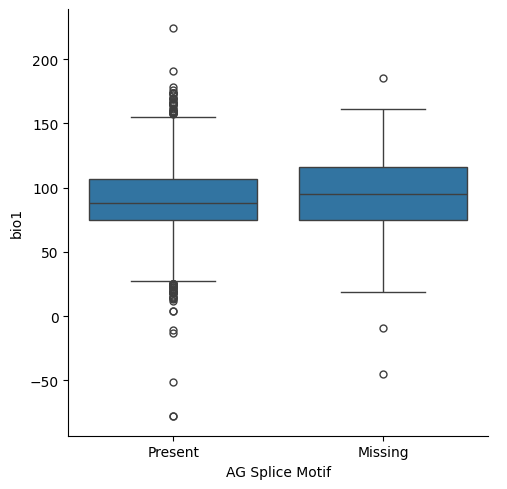

89.40572556762093
91.72941176470589


In [ ]:
# Identify accessions with AG splice motif at the end of the intron or missing values
AG_end = intron[((intron[11534075] == 'A') & (intron[11534076] == 'G'))].reset_index()
AG_end['AG Splice Motif'] = 'Present'

AG_missing = intron[intron[11534075].isna() & intron[11534076].isna()].reset_index()
AG_missing['AG Splice Motif'] = 'Missing'

AG_grouped = pd.concat([AG_end, AG_missing])[["name", "bio1", "AG Splice Motif"]].reset_index()

sns.catplot(data=AG_grouped, x='AG Splice Motif', y='bio1', kind='box')  # Boxplot of bio1 by AG motif presence
plt.show()

print(np.mean(AG_grouped[AG_grouped['AG Splice Motif'] == 'Present']['bio1']))  # Mean bio1 for present
print(np.mean(AG_grouped[AG_grouped['AG Splice Motif'] == 'Missing']['bio1']))  # Mean bio1 for missing

### Do warmer accessions have a difference in the number of GT or AG splice signals?

### 

In [ ]:
# For all None values in the intron DataFrame, replace with the corresponding value from Col-0 reference
intron = intron.reset_index(inplace=False).set_index(["V1", "name", "bio1"])
#col0_vals = intron.loc[(6909, "Col-0", 130)].fillna("N")
#intron = intron.fillna(col0_vals)
intron.head()

,,,11533057,11533058,11533059,11533060,11533061,11533062,11533063,11533064,11533065,11533066,...,11534067,11534068,11534069,11534070,11534071,11534072,11534073,11534074,11534075,11534076
V1,name,bio1,,,,,,,,,,,,,,,,,,,,,
7183,Kas-1,-78.0,G,T,G,A,G,G,A,A,A,C,...,A,A,T,T,T,A,T,T,A,G
8424,Kas-2,-78.0,G,T,G,A,G,G,A,A,A,C,...,A,A,T,T,T,A,T,T,A,G
766,Dja-1,-51.0,G,T,G,A,G,G,A,A,A,C,...,A,A,T,T,T,A,T,T,A,G
10015,Ara-1,-45.0,G,T,G,A,G,G,A,A,None,C,...,None,None,None,None,None,None,None,None,None,None
15560,Valm,-13.0,G,T,G,A,G,G,A,A,A,C,...,A,A,T,T,T,A,T,T,A,G


In [ ]:
import re

# Find the longest run of consecutive C, T, or N in a sequence
def longest_CT_run(seq):
    matches = re.findall(r'[CTN]+', seq)
    if matches:
        return max(len(m) for m in matches)
    else:
        return 0

# Find the longest run of consecutive G, T, or N in a sequence
def longest_GT_run(seq):
    matches = re.findall(r'[GTN]+', seq)
    if matches:
        return max(len(m) for m in matches)
    else:
        return 0

# Find the longest run of consecutive 'CTT' motifs in a sequence
def longest_GT_repeat(seq):
    matches = re.findall(r'(?:CTT)+', seq)
    if matches:
        # Each 'CTT' is length 3, so count how many 'CTT' in the run
        return max(len(m)//3 for m in matches)
    else:
        return 0


In [ ]:
# Build a DataFrame of intron sequences and extract sequence features
intron_seqs = intron[[]]  # Start with empty DataFrame with same index as intron
intron_seqs["Sequence"] = intron.apply(lambda x: "".join(x.dropna()), axis=1)  # Concatenate SNPs into a sequence string
intron_seqs["GT count"] = intron_seqs["Sequence"].apply(lambda x: x.count("GT"))  # Count GT motifs
intron_seqs["AG count"] = intron_seqs["Sequence"].apply(lambda x: x.count("AG"))  # Count AG motifs
intron_seqs["T count"] = intron_seqs["Sequence"].apply(lambda x: x.count("T"))  # Count T bases
intron_seqs["C count"] = intron_seqs["Sequence"].apply(lambda x: x.count("C"))  # Count C bases
intron_seqs["GT first"] = intron_seqs["Sequence"].apply(lambda x: x[:2] == "GT")  # Check if sequence starts with GT
intron_seqs["AG last"] = intron_seqs["Sequence"].apply(lambda x: x[-2:] == "AG")  # Check if sequence ends with AG
intron_seqs["Longest CT"] = intron_seqs["Sequence"].apply(lambda x: longest_CT_run(x))  # Longest run of C/T/N
intron_seqs["Longest CT repeat"] = intron_seqs["Sequence"].apply(lambda x: longest_GT_repeat(x))  # Longest run of CTT repeats
intron_seqs = intron_seqs.reset_index(inplace=False).set_index("V1")  # Set V1 as index
intron_seqs = intron_seqs.join(accessions_climate.drop(["Sequence", "name", "bio1"], axis=1).set_index("V1"), how = "left")  # Add metadata

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_65004/2410947036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intron_seqs["Sequence"] = intron.apply(lambda x: "".join(x.dropna()), axis=1)
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_65004/2410947036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intron_seqs["GT count"] = intron_seqs["Sequence"].apply(lambda x: x.count("GT"))
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_65004/2410947036.py:5: SettingWithCopy

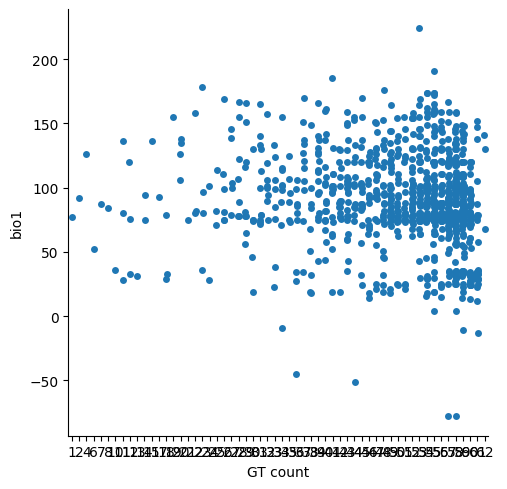

In [20]:
sns.catplot(intron_seqs, x = "GT count", y = "bio1")

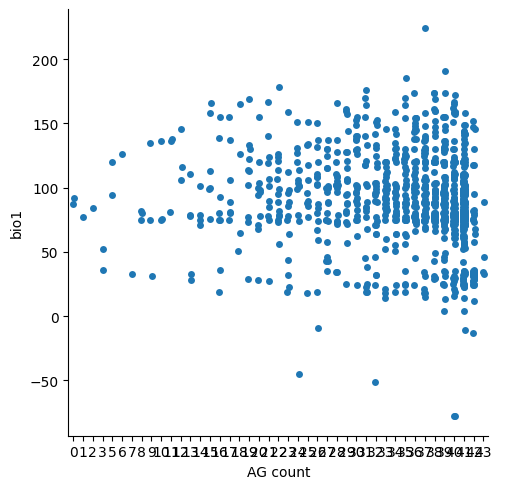

In [21]:
sns.catplot(intron_seqs, x = "AG count", y = "bio1")

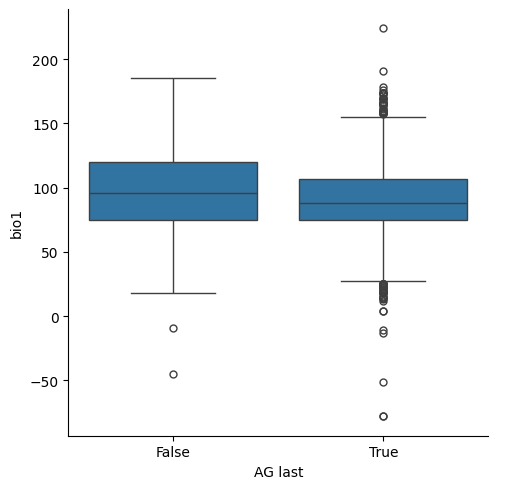

In [22]:
sns.catplot(intron_seqs, x = "AG last", y = "bio1", kind = "box")

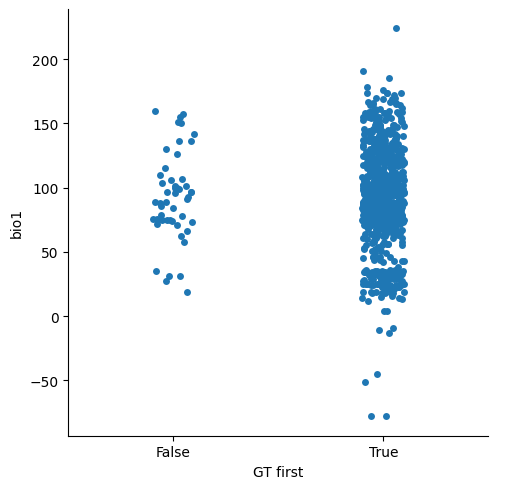

In [23]:
#intron_seqs = intron_seqs.reset_index(inplace=False)
sns.catplot(intron_seqs, x = "GT first", y = "bio1")

In [ ]:
col0 = acc_bio_var_df[acc_bio_var_df["name"] == "Col-0"]
col0

,bio1,name,11531967,11531968,11531969,11531970,11531971,11531972,11531973,11531974,...,11534349,11534350,11534351,11534352,11534353,11534354,11534355,11534356,11534357,11534358
V1,,,,,,,,,,,,,,,,,,,,,
6909,130.0,Col-0,T,T,T,T,T,C,C,T,...,None,C,A,T,T,T,A,G,G,C


In [ ]:
# Mask SNP columns by comparing each value to the Col-0 reference for that SNP
col0_ref = acc_bio_var_df.drop(["bio1", "name"], axis=1)  # SNP columns only
col0_ref_masked = col0_ref.apply(lambda col: [True if x == col0[col.name].iloc[0] else x for x in col])  # True if matches Col-0
col0_ref_masked = acc_bio_var_df[["bio1", "name"]].join(col0_ref_masked)  # Add back metadata columns
col0_ref_masked.head()

,bio1,name,11533963,11533964,11533965,11533966,11533967,11533968,11533969,11533970,...,11534154,11534155,11534156,11534157,11534158,11534159,11534160,11534161,11534162,11534163
V1,,,,,,,,,,,,,,,,,,,,,
88,116.0,CYR,None,None,None,None,True,None,None,None,...,True,True,True,G,T,True,True,True,True,True
108,108.0,LDV-18,True,True,True,True,True,True,True,True,...,True,True,True,G,T,True,True,True,True,True
139,108.0,LDV-46,True,True,True,True,True,True,True,True,...,True,True,True,G,T,True,True,True,True,True
159,100.0,MAR2-3,True,True,True,True,True,True,True,True,...,True,True,True,G,T,True,True,True,True,True
265,130.0,PYL-6,True,True,True,True,True,True,True,True,...,True,True,True,G,T,True,True,True,True,True


In [ ]:
# Calculate the fraction of accessions that differ from Col-0 at each SNP position
variation = pd.DataFrame(col0_ref_masked.drop(["bio1", "name"], axis=1).T.apply(lambda x: np.count_nonzero(x)/len(x), axis=1), columns=["Fraction Variation"])
variation_alleles = variation[variation["Fraction Variation"] != 1].index.to_list()  # SNPs with variation
variation_alleles_df = acc_bio_var_df[variation_alleles]  # DataFrame of variable SNPs
variation_alleles_df

,11533963,11533964,11533965,11533966,11533968,11533969,11533970,11533971,11533972,11533973,...,11534151,11534152,11534154,11534155,11534156,11534159,11534160,11534161,11534162,11534163
V1,,,,,,,,,,,,,,,,,,,,,
88,None,None,None,None,None,None,None,None,None,None,...,None,G,A,A,A,C,A,C,T,G
108,C,A,G,T,T,T,T,T,T,T,...,G,G,A,A,A,C,A,C,T,G
139,C,A,G,T,T,T,T,T,T,T,...,G,G,A,A,A,C,A,C,T,G
159,C,A,G,T,T,T,T,T,T,T,...,G,G,A,A,A,C,A,C,T,G
265,C,A,G,T,T,T,T,T,T,T,...,G,G,A,A,A,C,A,C,T,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18694,C,A,G,T,T,T,T,T,T,T,...,G,G,A,A,A,C,A,C,T,G
18696,C,A,G,T,T,T,T,T,T,T,...,G,G,A,A,A,C,A,C,T,G
19949,C,A,G,T,T,T,T,T,T,T,...,G,G,A,A,A,C,A,C,T,G


In [ ]:
def percentile_rounded(x, arr):
    pct = (np.sum(arr <= x) / len(arr)) * 100
    return int(round(pct / 5) * 5)

acc_bio_var_df["bio1 percentile"] = acc_bio_var_df["bio1"].apply(lambda x: percentile_rounded(x, acc_bio_var_df["bio1"]))

In [ ]:
import scipy.stats as stat

def calculate_corr_temp(id):
    valuecountdf = acc_bio_var_df.groupby("bio1 percentile")[id].value_counts().unstack(fill_value=0)
    if None in valuecountdf.columns or len(valuecountdf.columns) < 2:
        return None

    fraction = valuecountdf.iloc[:, 0]/valuecountdf.iloc[:, 1]
    #alleles = valuecountdf.columns.to_list()
    valuecountdf = valuecountdf.reset_index()
    return stat.pearsonr(valuecountdf["bio1 percentile"], fraction)

def get_alleles(id):
    valuecountdf = acc_bio_var_df.groupby("bio1 percentile")[id].value_counts().unstack(fill_value=0)
    if None in valuecountdf.columns or len(valuecountdf.columns) < 2:
        return None
    alleles = valuecountdf.columns.to_list()
    return alleles
